In [1]:
## CHECK SPACY library FOR TEXT STUFF


## TRY THE POS APPROACH FOR THIS

# Check :Term Frequency Inverse Document Frequency (TF-IDF)

In [2]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np

#load in the NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords

# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize

# Lemmatizer helps to reduce words to the base form

from nltk.stem import WordNetLemmatizer

# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams

# We can use counter to count the objects from collections
from collections import Counter

# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
def word_frequency(sentence):

    # joins all the sentenses
    # sentence ="".join(sentence)

    # creates tokens, creates lower class, removes numbers etc

    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]

    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))

    #creates 3 data frames and returns them
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams

In [4]:
data = pd.read_csv('test_count_frequency.csv')

data = data.dropna()


In [5]:
data

,Situation,Automatic Thoughts,Emotions/Feelings,Distress,Sent_Negatve,Sent_Neutral,Sent_Positive
0,my boss called me,I thought I did something wrong. Why do I alwa...,Anxious,7,0.962248,0.034971,0.002781
1,situation,I didn't do very well at dieting.,emotion,distress,0.920081,0.072814,0.007105
2,situation,That I don't have enough willpower.,emotion,distress,0.660768,0.317382,0.021850
3,situation,That I can't lose weight.,emotion,distress,0.669151,0.312037,0.018812
4,situation,That i'll always be fat and unhealthy,emotion,distress,0.906326,0.085673,0.008002
...,...,...,...,...,...,...,...
996,situation,Everyone will think i'm stupid.,emotion,distress,0.870282,0.118438,0.011280
997,situation,My boyfriend made fun of me for losing a game....,emotion,distress,0.852733,0.133685,0.013582
998,situation,sadness,emotion,distress,0.798574,0.173811,0.027616
999,situation,I would work as hard as possible to find somet...,emotion,distress,0.013690,0.233428,0.752882


In [6]:
text = data['Automatic Thoughts'].str.cat(sep = ' ')


In [7]:
freq = word_frequency(text)[0] 


In [8]:
freq['word_freq'] = (freq['word'] + ' ') * freq['frequency']

In [9]:
freq

,word,frequency,word_freq
19,would,181,would would would would would would would woul...
30,job,80,job job job job job job job job job job job jo...
26,get,68,get get get get get get get get get get get ge...
20,try,62,try try try try try try try try try try try tr...
205,work,47,work work work work work work work work work w...
...,...,...,...
623,often,1,often
625,remember,1,remember
626,memorable,1,memorable
627,liked,1,liked


In [10]:
freq_25 = freq[freq['frequency'] > 25]



In [11]:
pairs = word_frequency(text)[1] 

pairs_5 = pairs[pairs['frequency'] > 5]

pairs_5


,pairs,frequency
74,"(would, mean)",26
21,"(would, try)",21
570,"(good, enough)",15
36,"(pay, bill)",9
18,"(gained, pound)",8
1077,"(get, job)",8
46,"(frustrated, would)",8
1345,"(try, talk)",7
255,"(write, essay)",7
787,"(applying, job)",6


In [12]:
trig = word_frequency(text)[2] 

trig_3 = trig[trig['frequency'] >=3]

trig_3


,trigrams,frequency
502,"(get, work, done)",5
1548,"(able, pay, bill)",4
36,"(pay, bill, lose)",3
871,"(party, know, host)",3
1564,"(disappointed, keep, applying)",3
1735,"(need, get, done)",3
336,"(would, make, feel)",3
651,"(trying, write, essay)",3
1462,"(would, try, talk)",3
843,"(keep, applying, job)",3


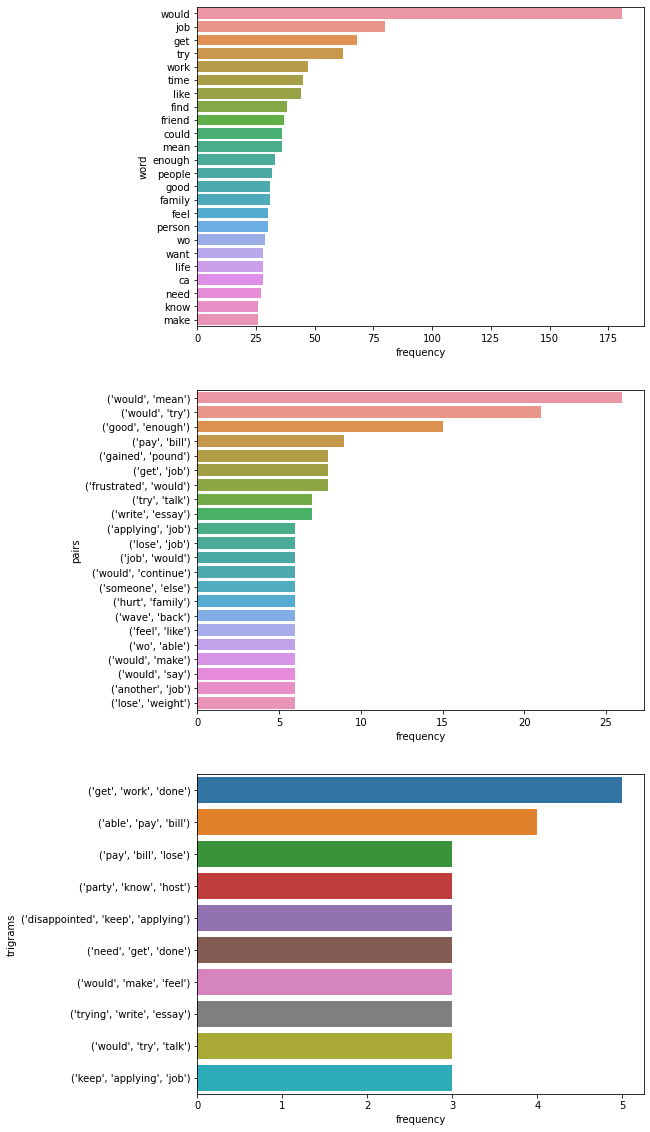

In [13]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=freq_25)
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=pairs_5)
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trig_3)

plt.show()

In [14]:
## Do the workcloud or something smarter

In [15]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [16]:
# Mask

face_mask = np.array(Image.open("../word_cloud/female-side-profile-silhouette-14.png"))
face_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [17]:
transformed_face_mask = np.ndarray((face_mask.shape[0],face_mask.shape[1]), np.int32)


In [18]:
transformed_face_mask = np.where(transformed_face_mask == 0, 255,0)

In [19]:
transformed_face_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

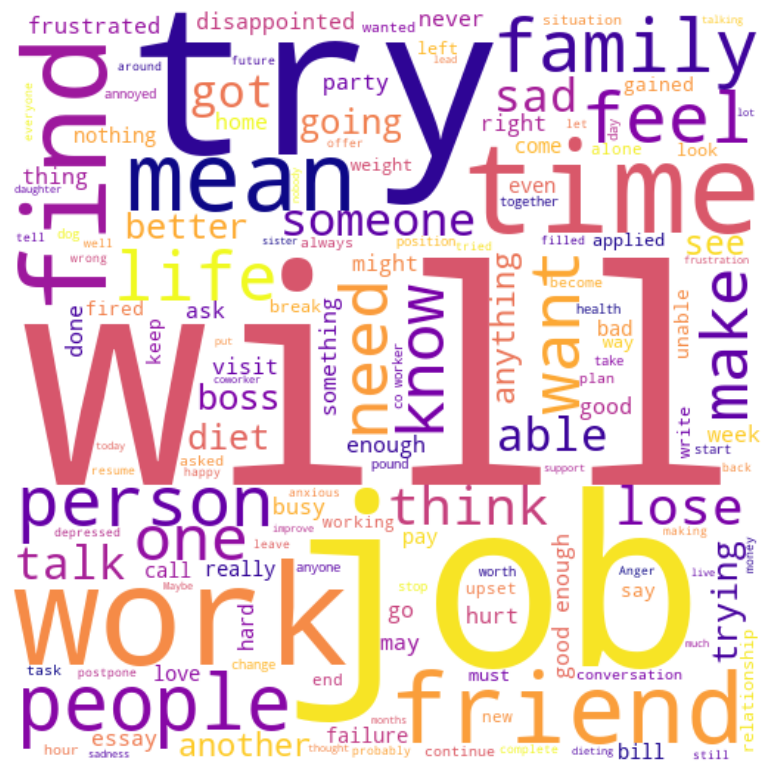

In [20]:

plt.rcParams['figure.dpi'] = 100
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=150, mask=transformed_face_mask,
            contour_width=0.01, contour_color='black', colormap='plasma')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("../word_cloud//wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
def word_frequency(dataframe):

    # joins all the sentenses
    # sentence ="".join(sentence)

    # creates tokens, creates lower class, removes numbers etc

    text = dataframe['Thoughts'].str.cat(sep = ' ') ## add this line into the mix so it conca

    new_tokens = word_tokenize(text)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]

    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))

    #creates 3 data frames and returns them
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    
    return word_freq,word_pairs,trigrams

In [22]:
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_frequency(data)[0]['frequency'] > 20)
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_frequency(data)[1]['frequency']  > 5)
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=word_frequency(data)[2]['frequency']  >= 3)

plt.show()

In [ ]:
pairs['frequency']

74      26
21      21
570     15
36       9
18       8
        ..
1348     1
1350     1
1351     1
1352     1
3663     1
Name: frequency, Length: 3664, dtype: int64

In [ ]:
new_freq = freq[['word','frequency']]

In [ ]:
def plotting_frequency(data):

    freq_plot = sns.barplot(x='frequency',y='word',data=pairs[pairs['frequency']>5]) 
    fig = freq_plot.get_figure()
    fig.savefig("freq_plot.png")

    return freq_plot

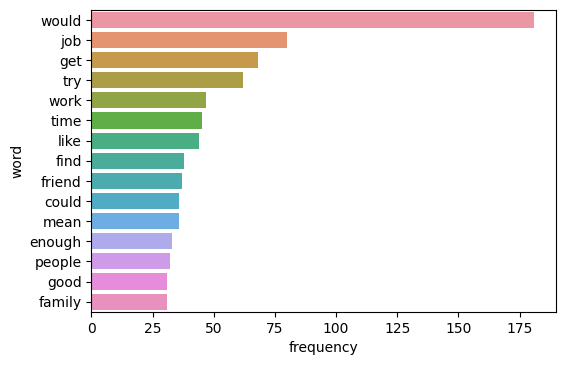

In [ ]:
plotting_frequency(new_freq)

plt.show()